In [1]:
import sys
sys.path.append('../')

In [3]:
import pandas as pd
import numpy as np
from src.feature_extraction import FeatureExtractor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('../data/processed/processed_data.csv')
print(f"Loaded data shape: {df.shape}")

Loaded data shape: (44823, 6)


In [5]:
extractor = FeatureExtractor()

In [6]:
print("\nExtracting features...")
feature_df = extractor.extract_all_features(df)


Extracting features...
Extracting sentiment features...
Extracting linguistic features...


c:\Users\PIYUSH PATRIKAR\Desktop\FactCheckAI\venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\PIYUSH PATRIKAR\Desktop\FactCheckAI\venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [7]:
print(f"Feature dataframe shape: {feature_df.shape}")
print(f"\nFeature columns: {feature_df.columns.tolist()}")

Feature dataframe shape: (44823, 19)

Feature columns: ['sentiment_compound', 'sentiment_pos', 'sentiment_neu', 'sentiment_neg', 'text_length', 'word_count', 'avg_word_length', 'title_length', 'uppercase_ratio', 'title_has_exclamation', 'title_has_question', 'exclamation_count', 'question_count', 'punctuation_ratio', 'sentence_count', 'avg_sentence_length', 'lexical_diversity', 'subjectivity', 'polarity']


In [8]:
feature_df['label'] = df['label']

In [9]:
print("\nFirst few rows of features:")
print(feature_df.head())


First few rows of features:
   sentiment_compound  sentiment_pos  sentiment_neu  sentiment_neg  \
0              0.0258          0.056          0.889          0.055   
1              0.9955          0.184          0.750          0.066   
2             -0.7960          0.107          0.747          0.146   
3             -0.8316          0.068          0.781          0.151   
4              0.7717          0.098          0.821          0.081   

   text_length  word_count  avg_word_length  title_length  uppercase_ratio  \
0         1028         171         4.988304            89         0.101167   
1         4820         771         5.249027            55         0.045228   
2         1848         304         5.023026            64         0.031385   
3         1244         183         5.704918            89         0.044212   
4         3137         529         4.928166            55         0.039847   

   title_has_exclamation  title_has_question  exclamation_count  \
0             

In [10]:
print(f"\nNaN values in features:")
print(feature_df.isnull().sum())


NaN values in features:
sentiment_compound         0
sentiment_pos              0
sentiment_neu              0
sentiment_neg              0
text_length                0
word_count                 0
avg_word_length          574
title_length               0
uppercase_ratio            0
title_has_exclamation      0
title_has_question         0
exclamation_count          0
question_count             0
punctuation_ratio          0
sentence_count             0
avg_sentence_length        0
lexical_diversity          0
subjectivity               0
polarity                   0
label                      0
dtype: int64


In [11]:
feature_df.fillna(0, inplace=True)

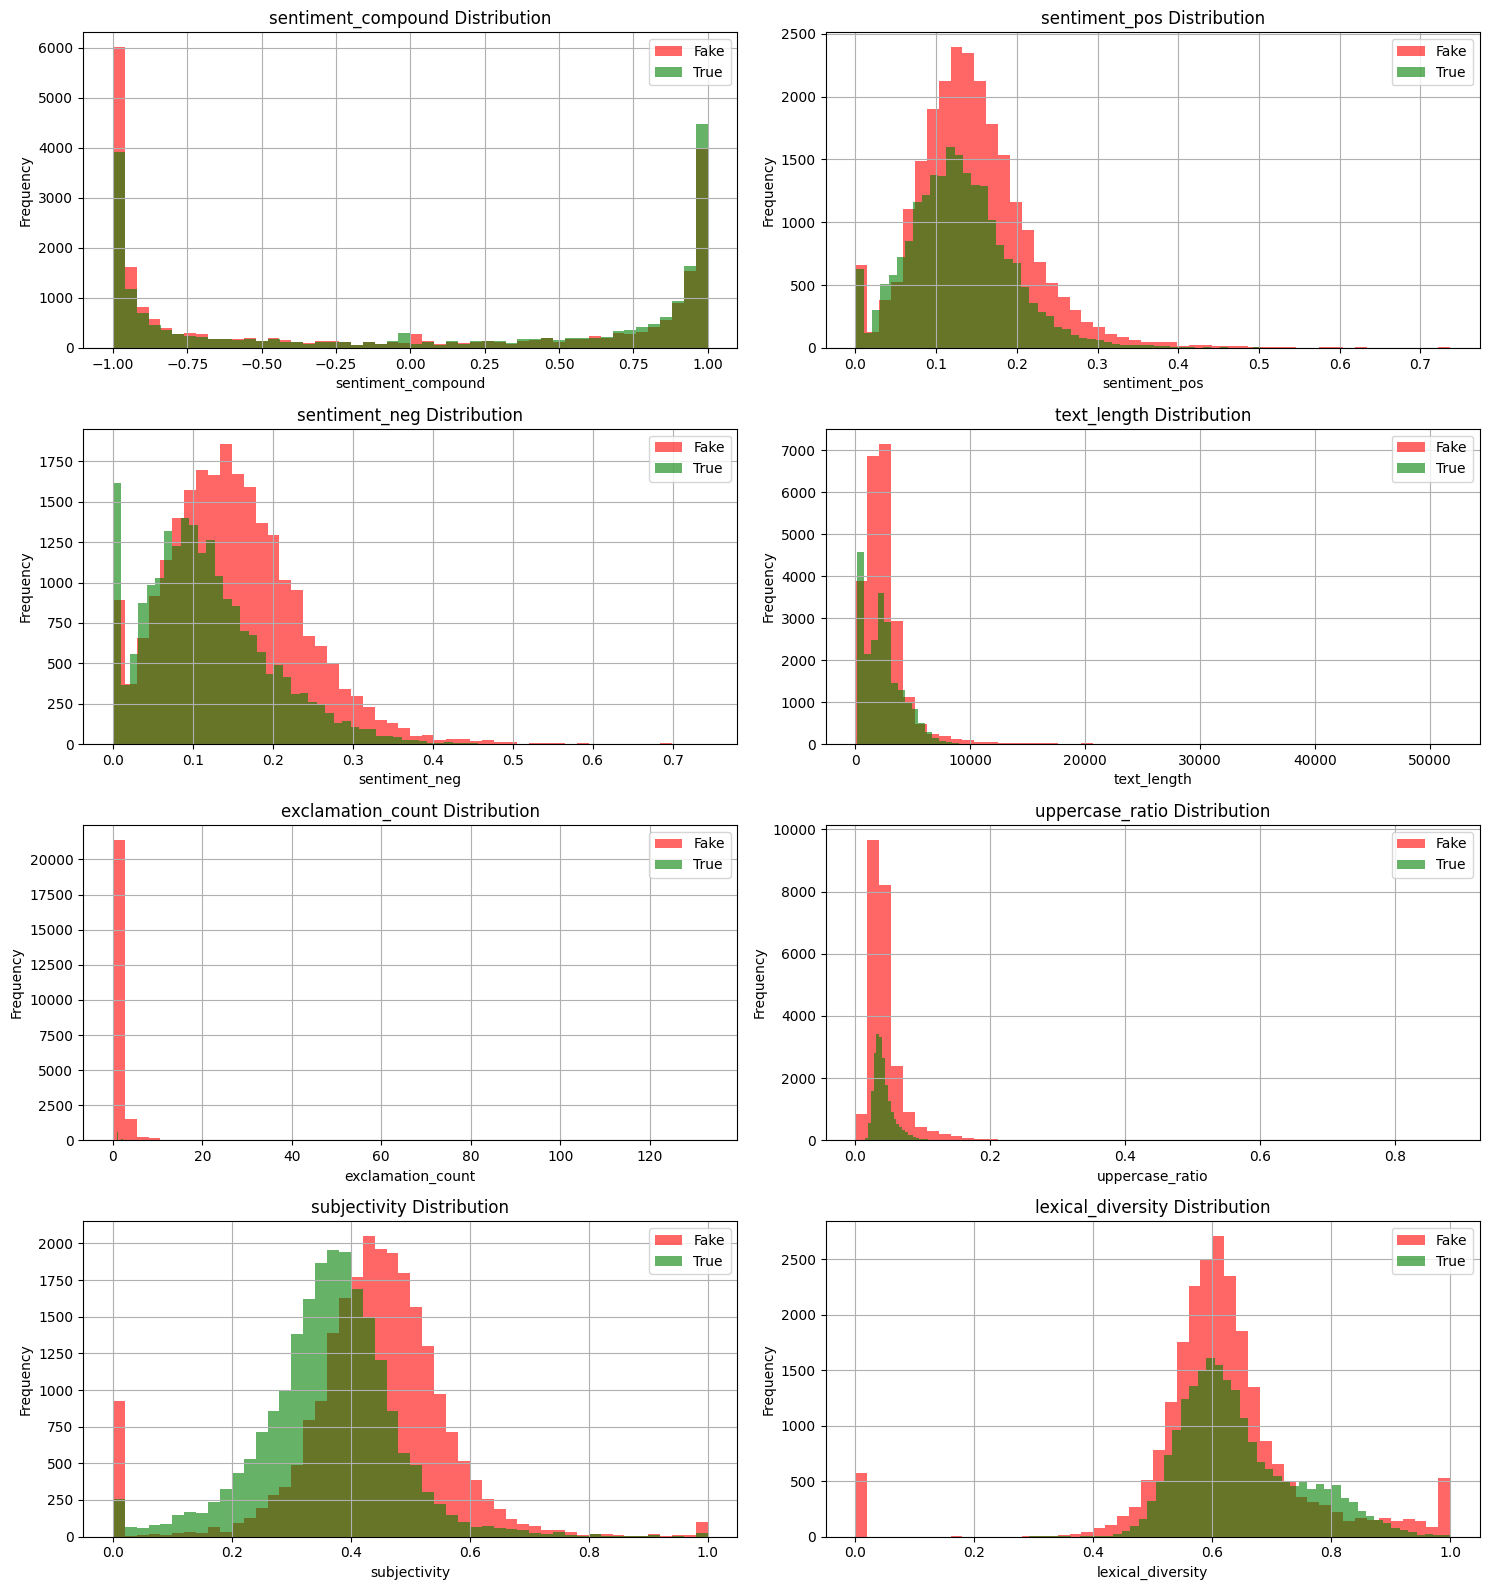

In [12]:
features_to_plot = ['sentiment_compound', 'sentiment_pos', 'sentiment_neg', 
                    'text_length', 'exclamation_count', 'uppercase_ratio',
                    'subjectivity', 'lexical_diversity']

fig, axes = plt.subplots(4, 2, figsize=(15, 16))
axes = axes.ravel()

for idx, feature in enumerate(features_to_plot):
    feature_df[feature_df['label']==0][feature].hist(bins=50, alpha=0.6, label='Fake', 
                                                       color='red', ax=axes[idx])
    feature_df[feature_df['label']==1][feature].hist(bins=50, alpha=0.6, label='True', 
                                                       color='green', ax=axes[idx])
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{feature} Distribution')
    axes[idx].legend()

plt.tight_layout()
plt.show()

In [13]:
print("\n" + "="*80)
print("FEATURE COMPARISON: FAKE vs TRUE NEWS")
print("="*80)


FEATURE COMPARISON: FAKE vs TRUE NEWS


In [14]:
comparison = feature_df.groupby('label')[features_to_plot].mean()
comparison.index = ['Fake', 'True']
print(comparison)

      sentiment_compound  sentiment_pos  sentiment_neg  text_length  \
Fake           -0.083529       0.145944       0.152606  2555.399880   
True            0.086869       0.128703       0.117371  2383.389755   

      exclamation_count  uppercase_ratio  subjectivity  lexical_diversity  
Fake           0.725040         0.045576      0.434998           0.616916  
True           0.061916         0.041738      0.361724           0.645613  


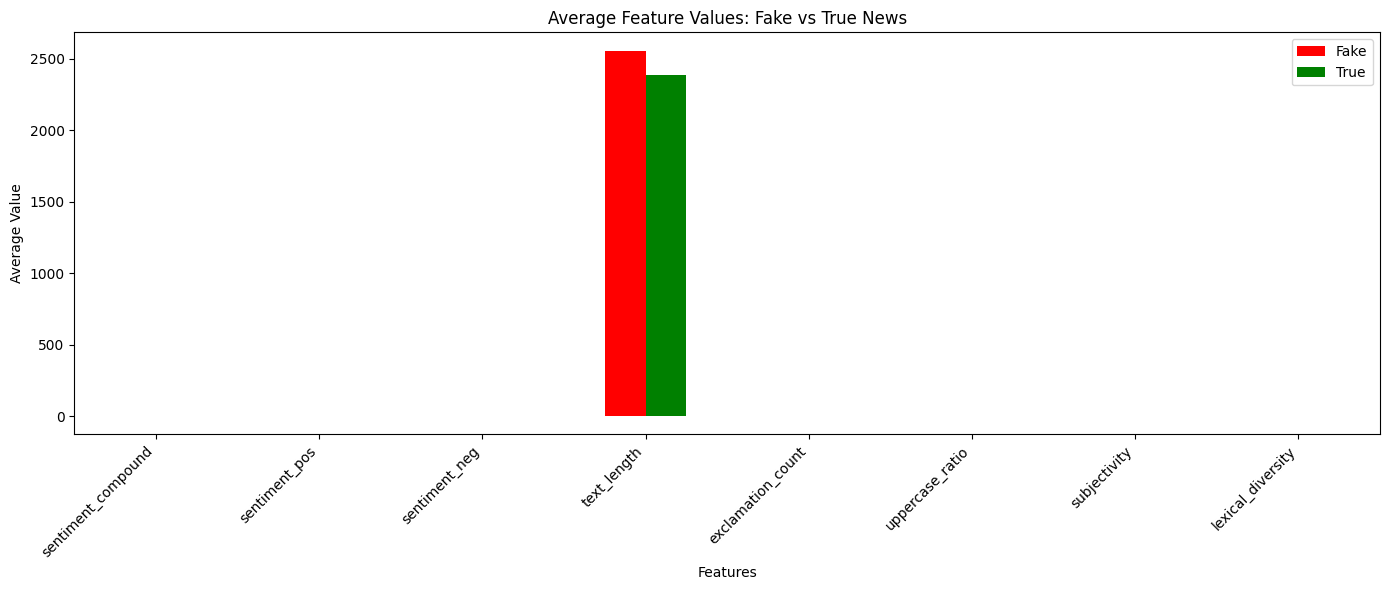

In [15]:
comparison.T.plot(kind='bar', figsize=(14, 6), color=['red', 'green'])
plt.title('Average Feature Values: Fake vs True News')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.legend(['Fake', 'True'])
plt.tight_layout()
plt.show()


In [16]:
print("\nExtracting TF-IDF features...")
tfidf_features = extractor.extract_tfidf_features(df['cleaned_text'].values, 
                                                   max_features=3000, 
                                                   ngram_range=(1, 2))

print(f"TF-IDF features shape: {tfidf_features.shape}")


Extracting TF-IDF features...
TF-IDF features shape: (44823, 3000)


In [17]:
tfidf_df = pd.DataFrame(
    tfidf_features.toarray(),
    columns=[f'tfidf_{i}' for i in range(tfidf_features.shape[1])]
)

print(f"TF-IDF dataframe shape: {tfidf_df.shape}")

TF-IDF dataframe shape: (44823, 3000)


In [18]:
feature_df_without_label = feature_df.drop('label', axis=1)
final_features = pd.concat([feature_df_without_label, tfidf_df], axis=1)
final_features['label'] = df['label']

In [19]:
print(f"\nFinal feature set shape: {final_features.shape}")
print(f"Total features: {final_features.shape[1] - 1}")


Final feature set shape: (44823, 3020)
Total features: 3019


In [20]:
final_features.to_csv('../data/processed/features.csv', index=False)
print("\nFeatures saved to '../data/processed/features.csv'")


Features saved to '../data/processed/features.csv'


In [21]:
metadata = df[['title', 'subject', 'label']].copy()
metadata.to_csv('../data/processed/metadata.csv', index=False)
print("Metadata saved to '../data/processed/metadata.csv'")

Metadata saved to '../data/processed/metadata.csv'


In [22]:
from sklearn.model_selection import train_test_split

X = final_features.drop('label', axis=1)
y = final_features['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
print(f"\nTrain set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nTrain label distribution:\n{y_train.value_counts()}")
print(f"\nTest label distribution:\n{y_test.value_counts()}")


Train set size: (35858, 3019)
Test set size: (8965, 3019)

Train label distribution:
label
0    18725
1    17133
Name: count, dtype: int64

Test label distribution:
label
0    4682
1    4283
Name: count, dtype: int64


In [24]:
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

print("\nTrain/Test splits saved!")


Train/Test splits saved!
